# Cleaning and Analysing Employee Exit Surveys
In this project we'll be working with exit surveys from employees of the Department of Education, Training and Employment (DETE), and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
The TAFE exit survey is located [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), and the DETE survey is [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

We're going to clean and analyse the datasets to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv')
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv', encoding='cp1252')
pd.options.display.max_columns = 150
print(dete_survey.head(20), tafe_survey.head(20))
print(dete_survey.shape, tafe_survey.shape)

    ID                        SeparationType Cease Date DETE Start Date  \
0    1                 Ill Health Retirement    08/2012            1984   
1    2      Voluntary Early Retirement (VER)    08/2012      Not Stated   
2    3      Voluntary Early Retirement (VER)    05/2012            2011   
3    4             Resignation-Other reasons    05/2012            2005   
4    5                        Age Retirement    05/2012            1970   
5    6             Resignation-Other reasons    05/2012            1994   
6    7                        Age Retirement    05/2012            1972   
7    8                        Age Retirement    05/2012            1988   
8    9             Resignation-Other reasons    07/2012            2009   
9   10            Resignation-Other employer       2012            1997   
10  11                        Age Retirement       2012            1999   
11  12  Resignation-Move overseas/interstate       2012            2009   
12  13             Resign

In [3]:
dete_survey.isnull().sum().sort_values()

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Job dissatisfaction                      0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Career move to public sector             0
Career move to private sector            0
Region     

From inital inspection of the DETE Survey we can see the following:

32 out of 55 columns have missing entries. However 25 of those are missing less than 10% of values. Additionally 4 columns refer to ethnicity and disability (Aboriginal, South Sea, Torres Strait and Disability) so are likely empty where they do not apply to the individual.
We can see there are likely more missing values as some columns e.g. `Start Date`, has values listed as `Not Stated` which don't show up as NaN when we look for null values. 

In [4]:
print(dete_survey['DETE Start Date'].value_counts(dropna=False))
print(dete_survey['Role Start Date'].value_counts(dropna=False))

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1970          21
1975          21
2013          21
2005          20
1990          20
1996          19
1999          19
1992          18
2004          18
1991          18
2000          18
1989          17
2002          15
2003          15
1988          15
1976          15
1978          15
1995          14
1979          14
1974          14
1980          14
1998          14
1997          14
1993          13
1972          12
1986          12
1977          11
2001          10
1984          10
1994          10
1969          10
1971          10
1981           9
1983           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64
Not Stated    98
2012          65
2011          57
2010          46
2008          45
2013        

In [5]:
#set the display to show all rows within the tafe dataset
pd.set_option('display.max_rows', tafe_survey.shape[0]+1)
tafe_survey.isnull().sum().sort_values()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
Reason for ceasing employment                                                                                                                                      1
CESSATION YEAR                                                                                                                                                     7
Induction. Did you undertake Workplace Induction?                                                                                                                 83
InstituteV

The TAFE Survey is missing data from all except 3 columns (Record ID, Institute, WorkArea). All of the columns with missing data have less than 90% complete data:
- Max 701/702 entries in Reason for ceasing employment
- Min 113/702 entries in Main Factor (Which contributing factor was the main reason for leaving)
- Most are missing between 83 and 270 entries

As with the DETE Survey, many rows could be empty as the column did not apply to them e.g.265 missing entries for Maternity/Family as a Contributing Factor may indicate it was not relevant to this individual leaving TAFE. 

# Identifing Missing Values and Dropping Columns

Now we'll read the DETE survey into pandas again, but this time setting `Not Stated` as `NaN`. We'll then drop some columns with values that are either missing or not relevant to the questions we are trying to answer.

In [6]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv', na_values='Not Stated')

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

# Cleaning Column Names

We can see that many columns across both datasets have the same meaning, but are worded slightly differently. Some examples are below:

|Dete Survey |Tafe Survey |Description |
|:-----------|:-----------|:-----------|
|ID          |Record ID   |Participant ID|
|SeparationType|Reason for ceasing employment|Why the employment ended|
|Cease Date  |CESSATION YEAR|Year or month employment ended|

As we want to combine them, we need to standardise the names. 

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [10]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id', 
                                                  'CESSATION YEAR': 'cease_date', 
                                                  'Reason for ceasing employment': 'separationtype', 
                                                  'Gender.     What is your Gender?': 'gender', 
                                                  'CurrentAge. Current Age': 'age',
                                                  'Employment Type.     Employment Type': 'employment_status',
                                                  'Classification.     Classification': 'position',
                                                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                  'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, 
                                                 axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

We've now standardised columns within dete_survey_updated by:
- Making all capitilisation lowercase
- Removing any trailing whitespace from the end of strings
- Replacing spaces with underscores

Additionally, we've renamed many of the columns within `tafe_survey_updated` so they match those within the other dataset. 

# Filtering the Data

In [11]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [13]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Remember we want to find out if employees who have only worked at the institutes for a short amount of time are leaving due to some kind of dissatisfation. Therefore first we combined the three different `Resignation` options within the tafe dataset, and then we created copies which only contain `Resignation` as the reason for leaving.

# Verifying the Data

In [14]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [15]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [16]:
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True))
print(dete_resignations['dete_start_date'].value_counts().sum())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
283


In [17]:
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))
print(tafe_resignations['cease_date'].value_counts().sum())

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64
335


In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].sort_index(ascending=True)
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].sort_index(ascending=True)
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].sort_index(ascending=True)

In [19]:
import matplotlib.pyplot as plt

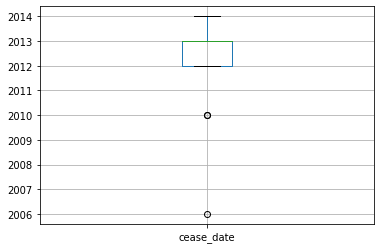

In [20]:
dete_resignations[['cease_date']].boxplot()

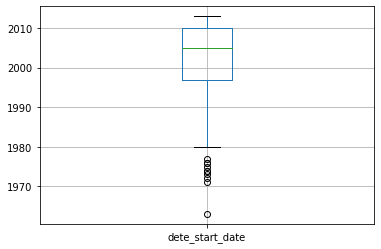

In [21]:
dete_resignations[['dete_start_date']].boxplot()

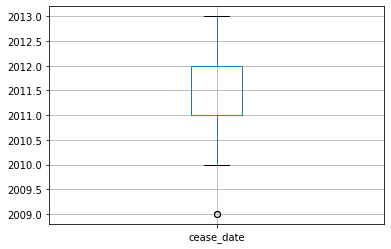

In [22]:
tafe_resignations[['cease_date']].boxplot()

Above we cleaned the `dete_resignations` `cease_date` column by extracting only the year, and converting to a float type.
We looked at data distribution of dete cease and start dates, and tafe cease dates. We can make the following observations:
- Dete cease date ranges from 2006 to 2014, with 297 out of 300 employees leaving between 2012 and 2014
- Dete start date ranges from 1963 to 2013, with the majority (60%, 170 out of 283) between 2004 and 2013. All years pre-2004 have less than 10 new employees
- Tafe cease date ranges from 2009 to 2013, with 333 out of 335 between 2010 and 2013

There don't appear to be any anomalies, or very old cease dates, so no further cleaning is needed on these columns before we move forward.

In [23]:
#Checking for NaN values in the 'cease_date' and 'dete_start_date' of the DETE dataset.
print(dete_resignations['cease_date'].isnull().sum())
print(dete_resignations['dete_start_date'].isnull().sum())
dete_resignations[dete_resignations['dete_start_date'].isna()]

11
28


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
16,17,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
39,40,Resignation,2012.0,NaN,NaN,Teacher,NaN,Central Queensland,NaN,Permanent Full-time,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
106,107,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,Central Office,Training and Tertiary Education Queensland,Temporary Part-time,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,Female,46-50,NaN,NaN,Yes,NaN,NaN
140,141,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN
196,197,Resignation,2012.0,NaN,NaN,Teacher Aide,NaN,North Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,46-50,NaN,NaN,NaN,NaN,NaN
288,289,Resignation,2013.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Education Queensland,Permanent Full-time,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
291,292,Resignation,2013.0,NaN,NaN,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
293,294,Resignation,2012.0,NaN,NaN,Schools Officer,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN
301,302,Resignation,2012.0,NaN,NaN,School Administrative Staff,NaN,NaN,NaN,Permanent Part-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
343,344,Resignation,2012.0,NaN,NaN,School Administrative Staff,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,41-45,NaN,NaN,NaN,NaN,Yes


# Creating a New Column

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].head(10))
print(dete_resignations['institute_service'].isnull().sum())

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
12    14.0
14     5.0
16     NaN
20    30.0
21    32.0
Name: institute_service, dtype: float64
38


The TAFE dataset already contains a column called 'institute_service', which shows the number of years an employee has been in service. We needed to replicate this within the DETE dataset, so created a new column by the same name which took the sum of the 'cease_date' minus the 'dete_start_date' columns to return the number of years employment for each row. 

# Identifying Unsatisfied Employees

Now we are going to categorise employees as dissatisfied based on their response to the following columns:
### TAFE Survey
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

### DETE Survey
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

In [25]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [26]:
#Creating a function which assigns True, False or NaN depending on responses to columns indicating dissatisfaction
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

In [27]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 
                                                       'lack_of_recognition', 'work_location', 'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    167
True     144
Name: dissatisfied, dtype: int64

# Combining the Data

In [28]:
#Creating new columns in each dataset, so we can distinguish between the two once combined
dete_institute = 'DETE'
dete_resignations_up['institute'] = dete_institute
tafe_institute = 'TAFE'
tafe_resignations_up['institute'] = tafe_institute

In [29]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
Classification.     Classification                     290
gender                                                 302
age                                                    3

In [30]:
#Removing any columns with a significant number of null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    int64  
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   institute_service  563 non-null    object 
 4   dissatisfied       643 non-null    object 
 5   institute          651 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 30.6+ KB


# Cleaning the Service Column

In [31]:
combined_updated['institute_service'].value_counts().sort_values()

31.0                   1
42.0                   1
35.0                   1
49.0                   1
34.0                   1
41.0                   1
33.0                   1
29.0                   1
27.0                   1
38.0                   1
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
21.0                   3
19.0                   3
39.0                   3
32.0                   3
11.0                   4
23.0                   4
24.0                   4
16.0                   5
18.0                   5
22.0                   6
12.0                   6
17.0                   6
14.0                   6
10.0                   6
15.0                   7
20.0                   7
8.0                    8
13.0                   8
More than 20 years    10
7.0                   13
2.0                   14
9.0                   14
4.0                   16
6.0                   17
0.0                   20


The output above shows there are both numbers and ranges, which we'll need cleaning before we can conduct our analysis. We will place people into one of 4 categories depending on their years of service:
- New: Less than 3 years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran: 11+ years

In [32]:
#converting to a string, extracting the first number from any ranges (e.g 7-10), then converting to a float
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
combined_updated['institute_service'].value_counts()

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [33]:
def mapping(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return 'Established'
    elif 3 <= val < 7:
        return 'Experienced' 
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(mapping)
combined_updated['service_cat'].value_counts(dropna=False)

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Performing the Initial Analysis

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


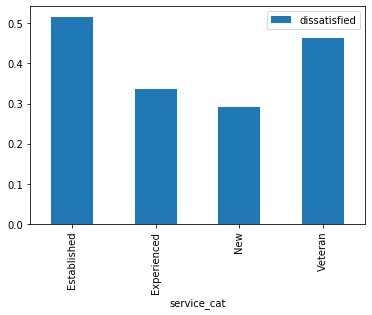

In [35]:
import matplotlib.pyplot as plt
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_pct.plot(kind='bar')
plt.show()

The bar chart above displays the proportion of dissatisfied employees by their years of experience (per our earlier grouping). We can see a trend that more experienced employees are more likely to experience dissatisfaction.

# Next Steps

From here we can conduct some further cleaning and analysis, specifically:
1. Review and decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. Try to answer how many people in each career stage resigned due to some kind of dissatisfaction?
2. Clean the age column. How many people in each age group resigned due to some kind of dissatisfaction?
3. Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [36]:
combined.isnull().sum().sort_values()

id                                                       0
separationtype                                           0
institute                                                0
dissatisfied                                             8
cease_date                                              16
institute_service                                       88
Institute                                              311
WorkArea                                               311
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. NONE                             319
Contributing Factors. Other                            3

In [37]:
new_combined = combined.dropna(thresh=311, axis=1)
new_combined.notnull().sum()

id                                                     651
separationtype                                         651
cease_date                                             635
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              311
lack_of_recognition                                    311
lack_of_job_security                                   311
work_location                                          311
employment_conditions                                  311
maternity/family                                       311
relocation                                             311
study/travel                                           311
ill_health                                             3

In [47]:
new_combined['dissatisfied'] = new_combined[['job_dissatisfaction', 
                                                       'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 
                                                       'lack_of_recognition', 'work_location', 'employment_conditions', 
                                                       'work_life_balance', 
                                                       'workload', 'Contributing Factors. Dissatisfaction',
                                            'Contributing Factors. Job Dissatisfaction', 
                                             'Contributing Factors. Interpersonal Conflict']].any(1)
new_combined['dissatisfied'].notnull().sum()

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


651

In [49]:
new_combined['institute_service'] = new_combined['institute_service'].astype('str').str.extract(r'(\d+)')
new_combined['institute_service'] = new_combined['institute_service'].astype('float')
new_combined['institute_service'].value_counts()
new_combined['service_cat'] = new_combined['institute_service'].apply(mapping)
new_combined['service_cat'].value_counts(dropna=False)

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

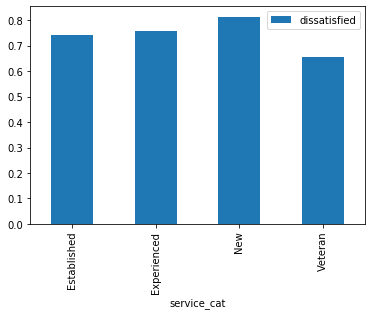

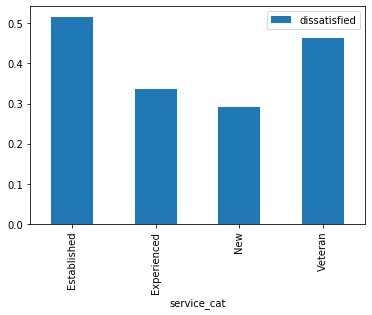

In [52]:
new_dis_pct = new_combined.pivot_table(index='service_cat', values='dissatisfied')
new_dis_pct.plot(kind='bar')
dis_pct.plot(kind='bar')
plt.show()